In [1]:
import os
import numpy as np
import cv2 as cv
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt


In [2]:

# Load and preprocess images
TrainPath = r'C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1'
categories = [
    'TTD AvavSam',
    'TTD FAHRIL ANTONIO HANDE',
    'TTD Lyra Attallah Aurellia',
    'TTD MARVELLOUS DEMETRIUS MAIT',
    'TTD MUHAMMAD AL-FARABY MOIDADY',
    'TTD Qhiran',
    'TTD SOPI',
    'TTD Vicram',
    'TTD_aqilah',
    'TTD_NOVITA',
    'TTD BRIANT_CJ',
    'TTD Fitri Handayani',
    'TTD MAHRECZY ADITYA',
    'TTD MOHAMMAD RAIYAN',
    'TTD NAtsya labaso',
    'TTD RIZKA FILARDI TOLIZ',
    'TTD SUPARMAN',
    'TTD Yuyun',
    'TTD_Hasby Ashidiq',
    'TTD Fadhil Akmal Zakaria',
    'TTD Fransisca',
    'TTD MARSYA CIKITA',
    'TTD MUH HALIIM',
    'TTD PUTRI CASIOLA',
    'TTD Siti Nurvatika',
    'TTD VIAAAAAAAAA',
    'TTD Zaky Putra',
    'TTD_Muh. Mashaq Ramadhan. M'
]



data = []

for category in categories:
    label = categories.index(category)
    path = os.path.join(TrainPath, category)
    for img in os.listdir(path):
        imgPath = os.path.join(path, img)
        try:
            imgArray = cv.imread(imgPath)
            imgResized = cv.resize(imgArray, (50, 50))
            image = np.array(imgResized).flatten()
            data.append([image, label])
            print("success load image from ", imgPath)
        except Exception as e:
            print("error load image from ", imgPath)
            pass


success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\1.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\10.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\11.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\12.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\13.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\14.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\15.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\16.png
success load image from  C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\UTS_\Train1\TTD AvavSam\

In [6]:

# Save data to pickle file
with open('dataImage.pickle', 'wb') as pick:
    pickle.dump(data, pick)
print("success save data image")


success save data image


In [7]:

# Load data from pickle file
with open('dataImage.pickle', 'rb') as pick:
    data = pickle.load(pick)


In [8]:

# Separate features and labels
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)


In [9]:

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)


In [10]:

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.1)


In [11]:

# Train the model
model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

print("Model training completed")

Model training completed


In [12]:
pick = open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()
print("Model saved")  

Model saved


In [13]:
pick = open('model.sav', 'rb')
model = pickle.load(pick)
pick.close()
print("Model loaded")

Model loaded


Prediksi gambar:  TTD Fadhil Akmal Zakaria
Model accuracy:  0.5238095238095238


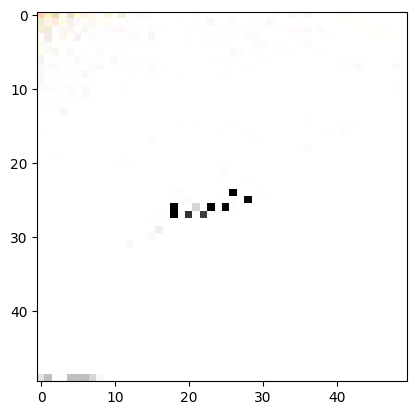

In [23]:
image_path = r'C:\Users\YOGA\Documents\1. Semester 3\Kecerdasan Buatan\tugas1\Test1\abi_test.jpg'  

# Muat gambar
imgArray = cv.imread(image_path)

# Resize gambar ke ukuran yang sesuai (50x50 seperti saat pelatihan)
imgResized = cv.resize(imgArray, (50, 50))

# Flatten gambar menjadi array 1D
image_flatten = np.array(imgResized).flatten()

# Prediksi gambar baru
prediction = model.predict([image_flatten])  # Masukkan gambar dalam bentuk list

categories = [
    'TTD AvavSam',
    'TTD FAHRIL ANTONIO HANDE',
    'TTD Lyra Attallah Aurellia',
    'TTD MARVELLOUS DEMETRIUS MAIT',
    'TTD MUHAMMAD AL-FARABY MOIDADY',
    'TTD Qhiran',
    'TTD SOPI',
    'TTD Vicram',
    'TTD_aqilah',
    'TTD_NOVITA',
    'TTD BRIANT_CJ',
    'TTD Fitri Handayani',
    'TTD MAHRECZY ADITYA',
    'TTD MOHAMMAD RAIYAN',
    'TTD NAtsya labaso',
    'TTD RIZKA FILARDI TOLIZ',
    'TTD SUPARMAN',
    'TTD Yuyun',
    'TTD_Hasby Ashidiq',
    'TTD Fadhil Akmal Zakaria',
    'TTD Fransisca',
    'TTD MARSYA CIKITA',
    'TTD MUH HALIIM',
    'TTD PUTRI CASIOLA',
    'TTD Siti Nurvatika',
    'TTD VIAAAAAAAAA',
    'TTD Zaky Putra',
    'TTD_Muh. Mashaq Ramadhan. M'
]

# Menampilkan hasil prediksi
print("Prediksi gambar: ", categories[prediction[0]])

accuracy = model.score(xtest, ytest)
print("Model accuracy: ", accuracy)


# Tampilkan gambar untuk verifikasi
imgResized = imgResized.reshape(50, 50, 3)  # Mengembalikan bentuk gambar
plt.imshow(imgResized, cmap='gray')
plt.show()

Model accuracy:  0.5238095238095238
Prediction:  TTD BRIANT_CJ


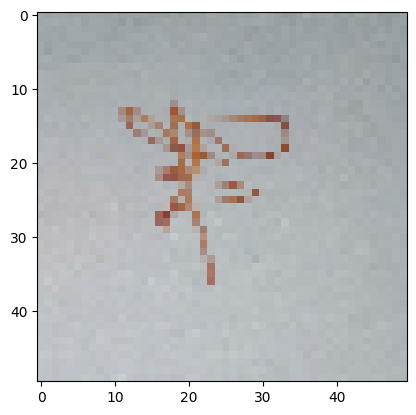

In [16]:
categories = [
    'TTD AvavSam',
    'TTD FAHRIL ANTONIO HANDE',
    'TTD Lyra Attallah Aurellia',
    'TTD MARVELLOUS DEMETRIUS MAIT',
    'TTD MUHAMMAD AL-FARABY MOIDADY',
    'TTD Qhiran',
    'TTD SOPI',
    'TTD Vicram',
    'TTD_aqilah',
    'TTD_NOVITA',
    'TTD BRIANT_CJ',
    'TTD Fitri Handayani',
    'TTD MAHRECZY ADITYA',
    'TTD MOHAMMAD RAIYAN',
    'TTD NAtsya labaso',
    'TTD RIZKA FILARDI TOLIZ',
    'TTD SUPARMAN',
    'TTD Yuyun',
    'TTD_Hasby Ashidiq',
    'TTD Fadhil Akmal Zakaria',
    'TTD Fransisca',
    'TTD MARSYA CIKITA',
    'TTD MUH HALIIM',
    'TTD PUTRI CASIOLA',
    'TTD Siti Nurvatika',
    'TTD VIAAAAAAAAA',
    'TTD Zaky Putra',
    'TTD_Muh. Mashaq Ramadhan. M'
]
predict = model.predict(xtest)
accuracy = model.score(xtest, ytest)
print("Model accuracy: ", accuracy)
print("Prediction: ", categories[predict[0]])

mySign = xtest[0].reshape(50, 50, 3)
plt.imshow(mySign, cmap='gray')
plt.show()
